In [15]:
import torch
from torch import nn
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# transforms
transform = transforms.ToTensor()
# get data
train = datasets.FashionMNIST('data', download=True,train=True, transform=transform)
test = datasets.FashionMNIST('data', download=True, train=False, transform=transform)

# dataloaders
train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=32)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=32)

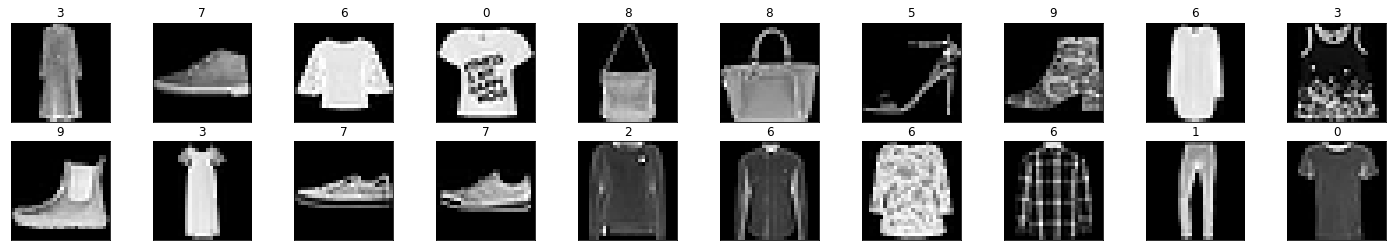

In [25]:
# visualize
# load a batch
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
# visualize
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [1]:
import numpy as np
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()
train = datasets.FashionMNIST('data', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=32)

test = datasets.FashionMNIST('data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(test, shuffle=True, batch_size=32)

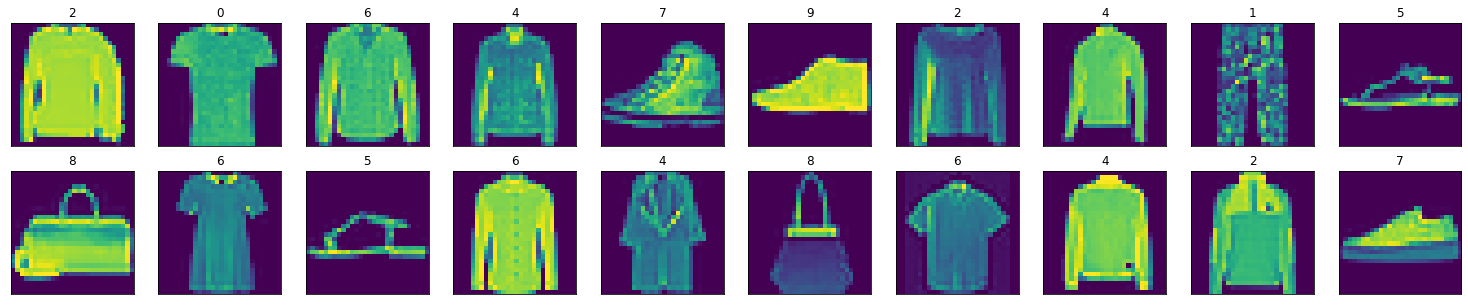

In [9]:
data, target = iter(trainloader).next()
images = data.numpy()
fig = plt.figure(figsize=(26,5))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    ax.set_title(str(target[idx].item()))

In [31]:
#######################
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
transform = transforms.ToTensor()
train_data = datasets.FashionMNIST('data', download=False, transform=transform)
test_data = datasets.FashionMNIST('data', download=False, transform=transform)

####
## splitting
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(0.2*num_train))
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
####

trainloader = DataLoader(train_data, batch_size=32, sampler=train_sampler)
validloader = DataLoader(train_data, batch_size=32, sampler=valid_sampler)
testloader = DataLoader(test_data, batch_size=32)

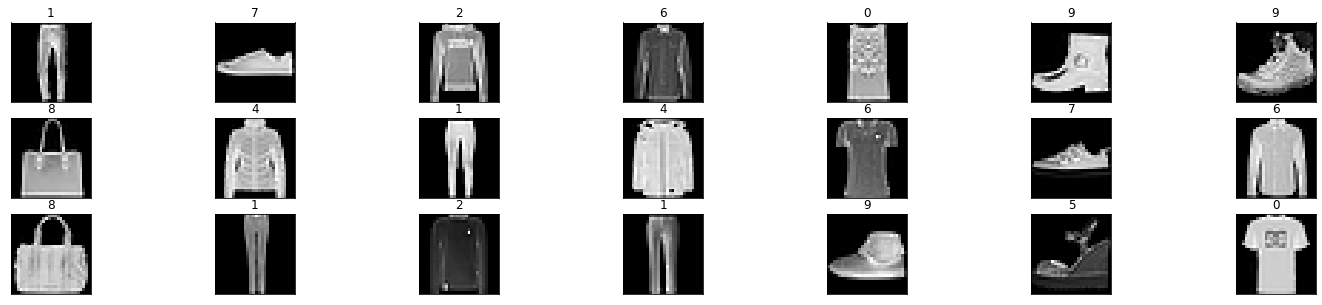

In [27]:
images, labels = iter(trainloader).next()
images.numpy()
fig = plt.figure(figsize=(25,5))
for idx in np.arange(21):
    ax = fig.add_subplot(3, 21/3, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(labels[idx].item())


In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1*28*28, 64)
        self.fc2 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.softmax(self.fc2(x), dim=1)
        return x

In [41]:
model = Net()
model

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.8)

In [52]:
## Training Loop
epochs = 20
trainloss = 0.0
validloss = 0.0
valid_loss_min = np.Inf

for e in range(epochs):
    #train pass
    model.train()
    for data, target in trainloader:
        optimizer.zero_grad()
        log_ps = model(data)
        loss = criterion(log_ps, target)
        loss.backward()
        optimizer.step()
        trainloss += loss.item()*data.size(0)
    
    for data, target in validloader:
        model.eval()
        logps = model(data)
        loss = criterion(logps, target)
        validloss += loss.item()*data.size(0)
    
    trainloss = trainloss/len(trainloader.dataset)
    validloss = validloss/len(validloader.dataset)
    
    print(f'Epoch: {e+1}, \tTrain Loss: {trainloss} ,\tValidation Loss: {validloss}')
    
    if validloss < valid_loss_min:
        print(f'Validation loss decreased from {valid_loss_min:.6f} ---> {validloss:.6f}, Saving model ......')
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = validloss

Epoch: 1, 	Train Loss: 1.3228391308466594 ,	Validation Loss: 0.32994907894134523
Validation loss decreased from inf ---> 0.329949, Saving model ......
Epoch: 2, 	Train Loss: 1.3202202207782185 ,	Validation Loss: 0.32916299439565977
Validation loss decreased from 0.329949 ---> 0.329163, Saving model ......
Epoch: 3, 	Train Loss: 1.3185829049307223 ,	Validation Loss: 0.32902982922261576
Validation loss decreased from 0.329163 ---> 0.329030, Saving model ......
Epoch: 4, 	Train Loss: 1.3183173362475733 ,	Validation Loss: 0.32839771761548053
Validation loss decreased from 0.329030 ---> 0.328398, Saving model ......
Epoch: 5, 	Train Loss: 1.315020580862668 ,	Validation Loss: 0.32932144021932513
Epoch: 6, 	Train Loss: 1.3131275448961353 ,	Validation Loss: 0.3298711484679937
Epoch: 7, 	Train Loss: 1.313609795157568 ,	Validation Loss: 0.33029285823455456
Epoch: 8, 	Train Loss: 1.3107296925179888 ,	Validation Loss: 0.32740225781065807
Validation loss decreased from 0.328398 ---> 0.327402, Savin

In [54]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [63]:
# initialize lists to monitor test loss and accuracy
testloss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in testloader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(32):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(testloss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.000000

Test Accuracy of     0: 93% (5599/6000)
Test Accuracy of     1: 97% (5829/6000)
Test Accuracy of     2: 85% (5148/6000)
Test Accuracy of     3: 91% (5467/6000)
Test Accuracy of     4: 87% (5272/6000)
Test Accuracy of     5: 97% (5848/6000)
Test Accuracy of     6:  0% ( 0/6000)
Test Accuracy of     7: 94% (5675/6000)
Test Accuracy of     8: 97% (5831/6000)
Test Accuracy of     9: 96% (5791/6000)

Test Accuracy (Overall): 84% (50460/60000)
